### Importando bibliotecas necessárias

In [28]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import re

### Baixar arquivos:

In [29]:
"""
url = 'https://files.grouplens.org/datasets/movielens/ml-1m.zip'

try:
    response = requests.get(url, verify=False)
    with open('ml-1m.zip', 'wb') as file:
        file.write(response.content)
    print("Download concluído com sucesso!")
except requests.exceptions.RequestException as e:
    print(f"Erro ao baixar o arquivo: {e}")

"""

'\nurl = \'https://files.grouplens.org/datasets/movielens/ml-1m.zip\'\n\ntry:\n    response = requests.get(url, verify=False)\n    with open(\'ml-1m.zip\', \'wb\') as file:\n        file.write(response.content)\n    print("Download concluído com sucesso!")\nexcept requests.exceptions.RequestException as e:\n    print(f"Erro ao baixar o arquivo: {e}")\n\n'

In [30]:
"""
url = 'https://files.grouplens.org/datasets/movielens/ml-1m-README.txt'

try:
    response = requests.get(url, verify=False)
    with open('ml-1m.zip', 'wb') as file:
        file.write(response.content)
    print("Download concluído com sucesso!")
except requests.exceptions.RequestException as e:
    print(f"Erro ao baixar o arquivo: {e}")
"""

'\nurl = \'https://files.grouplens.org/datasets/movielens/ml-1m-README.txt\'\n\ntry:\n    response = requests.get(url, verify=False)\n    with open(\'ml-1m.zip\', \'wb\') as file:\n        file.write(response.content)\n    print("Download concluído com sucesso!")\nexcept requests.exceptions.RequestException as e:\n    print(f"Erro ao baixar o arquivo: {e}")\n'

In [31]:
# Lendo o arquivo movies.dat
filepath_movies = os.path.join('data/ml-1m', 'movies.dat')
filepath_ratings = os.path.join('data/ml-1m', 'ratings.dat')
filepath_users  = os.path.join ('data/ml-1m', 'users.dat')

df_movies = pd.read_csv(
    filepath_movies,
    delimiter='::',
    engine='python',
    names=['MovieID', 'Title', 'Genres'],
    encoding='latin1'
)

# Lendo o arquivo ratings.dat
df_ratings = pd.read_csv(
    filepath_ratings,
    delimiter='::',
    engine='python',
    names=['UserID', 'MovieID', 'Rating', 'Timestamp'],
    encoding='latin1'
)

# Lendo o arquivo users.dat
df_users = pd.read_csv(
    filepath_users,
    delimiter='::',
    engine='python',
    names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'],
    encoding='latin1'
)

print(df_movies.head())
print(df_ratings.head())
print(df_users.head())


   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


### Faremos agora uma análise exploratória dos dados

In [32]:
print(df_movies.shape)
print(df_ratings.shape)
print(df_users.shape)

(3883, 3)
(1000209, 4)
(6040, 5)


##### 3883 filmes 1000209 avaliações e 6040 usuários

In [33]:
null_counts = df_movies.isnull().sum()
print("Valores nulos por coluna:\n", null_counts)

Valores nulos por coluna:
 MovieID    0
Title      0
Genres     0
dtype: int64


In [34]:
null_counts = df_ratings.isnull().sum()
print("Valores nulos por coluna:\n", null_counts)

Valores nulos por coluna:
 UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64


In [35]:
null_counts = df_users.isnull().sum()
print("Valores nulos por coluna:\n", null_counts)

Valores nulos por coluna:
 UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64


Nenhum valor nulo

Para facilitar vamos tirar o ano do filme do nome, e por em uma nova coluna

In [36]:
def extract_year(title):
    match = re.search(r'\((\d{4})\)', title)
    if match:
        return int(match.group(1))
    return None

df_movies['Year'] = df_movies['Title'].apply(extract_year)
print(df_movies.head())

   MovieID                               Title                        Genres  \
0        1                    Toy Story (1995)   Animation|Children's|Comedy   
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2        3             Grumpier Old Men (1995)                Comedy|Romance   
3        4            Waiting to Exhale (1995)                  Comedy|Drama   
4        5  Father of the Bride Part II (1995)                        Comedy   

   Year  
0  1995  
1  1995  
2  1995  
3  1995  
4  1995  


##### Vamos fazer um gráfico de quantidade de filmes x ano

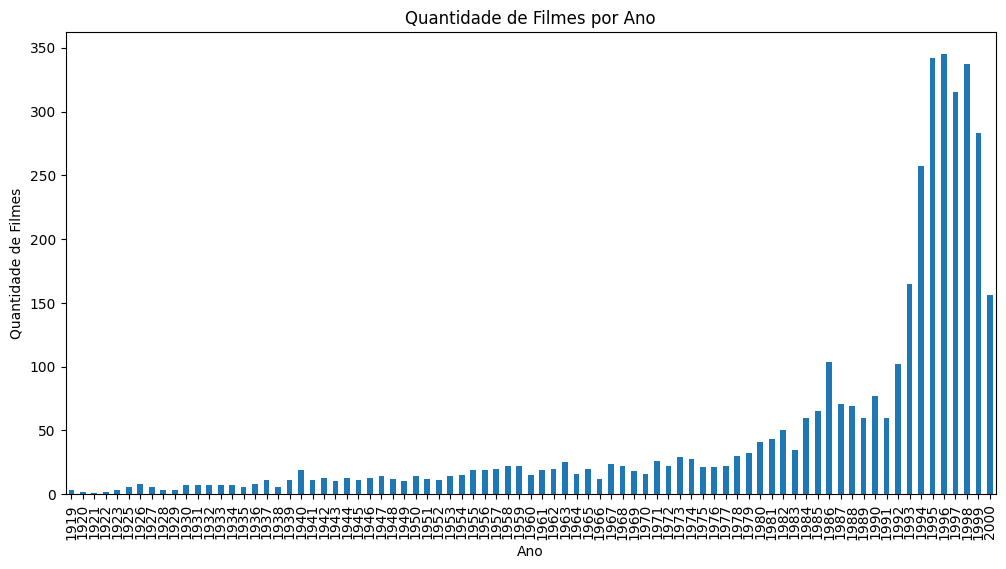

In [37]:
movies_per_year = df_movies['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='bar')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Filmes')
plt.title('Quantidade de Filmes por Ano')
plt.show()


##### Podemos ver que a gigante maioria dos filmes é da década de 90

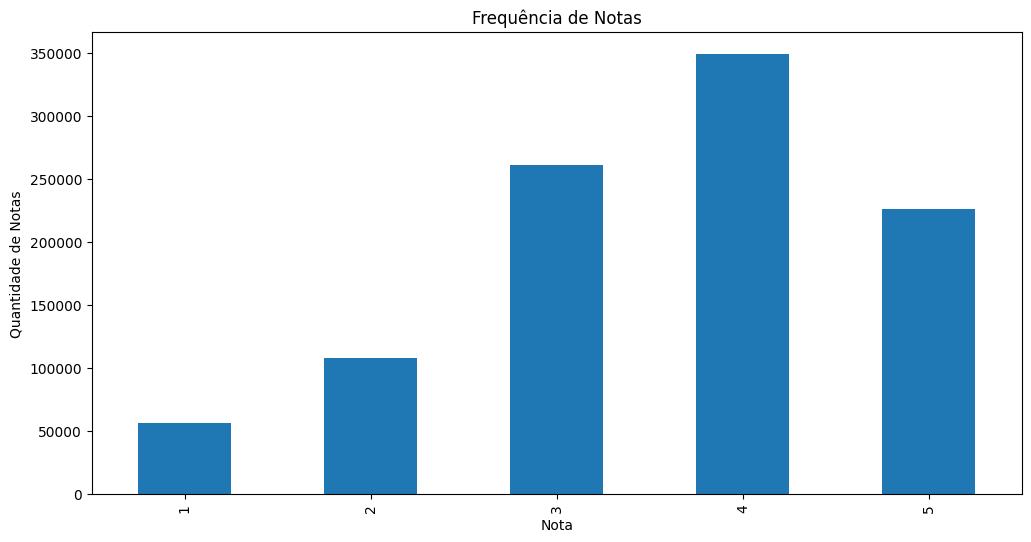

In [38]:
ratings = df_ratings['Rating'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
ratings.plot(kind='bar')
plt.xlabel('Nota')
plt.ylabel('Quantidade de Notas')
plt.title('Frequência de Notas')
plt.show()

##### Pouquíssimas notas baixas!

Separando agora por genero

In [39]:
from collections import Counter

def count_genres(genres_series):
    genre_count = Counter()
    for genres in genres_series:
        genre_list = genres.split('|')
        genre_count.update(genre_list)
    return genre_count

genre_count = count_genres(df_movies['Genres'])
print(genre_count)

Counter({'Drama': 1603, 'Comedy': 1200, 'Action': 503, 'Thriller': 492, 'Romance': 471, 'Horror': 343, 'Adventure': 283, 'Sci-Fi': 276, "Children's": 251, 'Crime': 211, 'War': 143, 'Documentary': 127, 'Musical': 114, 'Mystery': 106, 'Animation': 105, 'Fantasy': 68, 'Western': 68, 'Film-Noir': 44})


Vamos converter para um dataframe so para facilitar o grafico

In [40]:
df_genres = pd.DataFrame.from_dict(genre_count, orient='index', columns=['Frequency'])
df_genres = df_genres.reset_index().rename(columns={'index': 'Genre'})
print(df_genres)

          Genre  Frequency
0     Animation        105
1    Children's        251
2        Comedy       1200
3     Adventure        283
4       Fantasy         68
5       Romance        471
6         Drama       1603
7        Action        503
8         Crime        211
9      Thriller        492
10       Horror        343
11       Sci-Fi        276
12  Documentary        127
13          War        143
14      Musical        114
15      Mystery        106
16    Film-Noir         44
17      Western         68


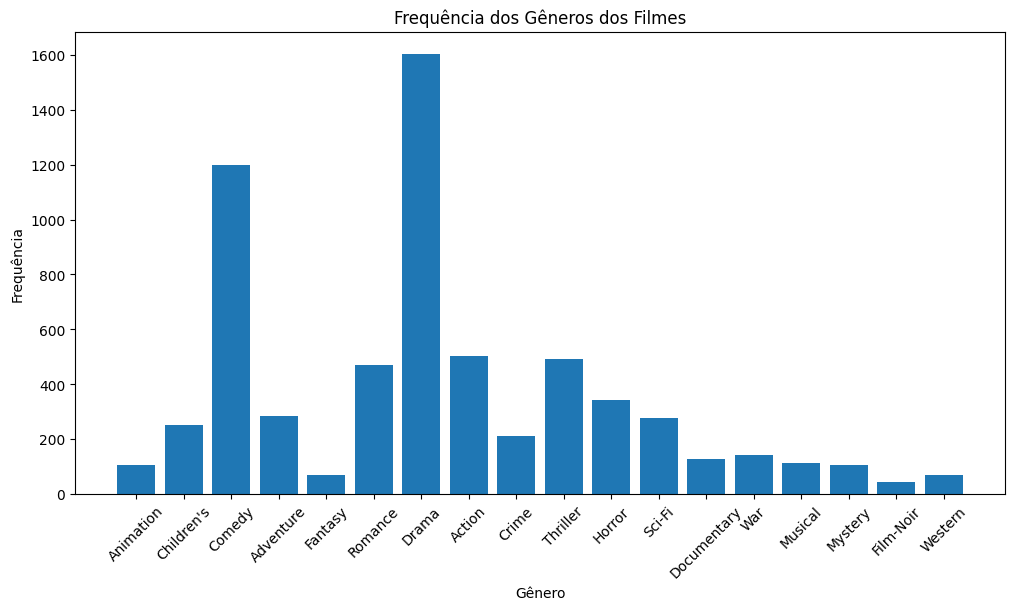

In [41]:
plt.figure(figsize=(12, 6))
plt.bar(df_genres['Genre'], df_genres['Frequency'])
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.title('Frequência dos Gêneros dos Filmes')
plt.xticks(rotation=45)
plt.show()

Muito mais filmes de comedia e drama

### Pré-processamento dos dados:

Ja vimos que nao tem valores nulos

##### Buscando valores duplicados:

In [42]:
duplicated_counts = df_movies.duplicated().sum()
print("Valores duplicados por coluna:\n", duplicated_counts)

Valores duplicados por coluna:
 0


In [43]:
duplicated_counts = df_ratings.duplicated().sum()
print("Valores duplicados por coluna:\n", duplicated_counts)

Valores duplicados por coluna:
 0


In [44]:
duplicated_counts = df_users.duplicated().sum()
print("Valores duplicados por coluna:\n", duplicated_counts)

Valores duplicados por coluna:
 0


In [45]:
df_genres.head()

,Genre,Frequency
0,Animation,105
1,Children's,251
2,Comedy,1200
3,Adventure,283
4,Fantasy,68


##### Normalizando os dados

In [46]:
df_genres = df_movies['Genres'].str.get_dummies(sep='|')

In [47]:
df_genres.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_normalized = scaler.fit_transform(df_genres)

In [49]:
df_genres.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
from scipy.spatial.distance import pdist, squareform

dist_matrix = pdist(data_normalized, metric='euclidean')
dist_matrix_square = squareform(dist_matrix)

print("Matriz de Distâncias Euclidianas:")
print(dist_matrix_square)

Matriz de Distâncias Euclidianas:
[[ 0.         10.75230503  7.9956348  ...  7.95967772  7.95967772
   8.50845673]
 [10.75230503  0.         10.17471128 ...  9.67392658  9.67392658
  10.13026267]
 [ 7.9956348  10.17471128  0.         ...  4.26505577  4.26505577
   5.21805204]
 ...
 [ 7.95967772  9.67392658  4.26505577 ...  0.          0.
   3.00622128]
 [ 7.95967772  9.67392658  4.26505577 ...  0.          0.
   3.00622128]
 [ 8.50845673 10.13026267  5.21805204 ...  3.00622128  3.00622128
   0.        ]]


vamos fazer um heatmap para ver as matrizes de distancias

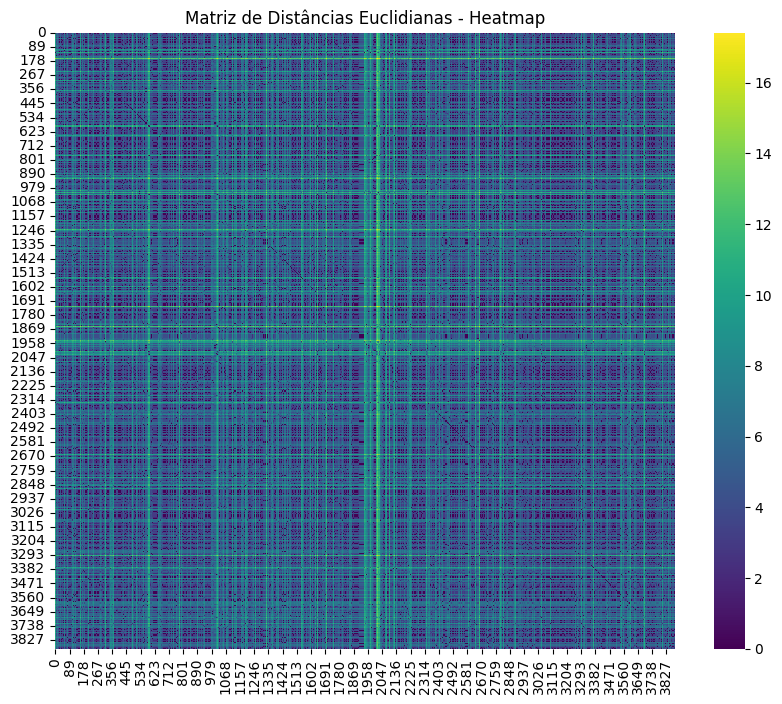

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(dist_matrix_square, cmap='viridis')
plt.title('Matriz de Distâncias Euclidianas - Heatmap')
plt.show()

Preparando as matrizes de distancias para o users

In [52]:
df_users_encoded = pd.get_dummies(df_users, columns=['Gender', 'Occupation'])

In [53]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df_users_encoded.drop(columns=['UserID', 'Zip-code']))

In [54]:
dist_matrix = pdist(data_normalized, metric='euclidean')
dist_matrix_square = squareform(dist_matrix)

In [55]:
user_ids = df_users['UserID'].tolist()

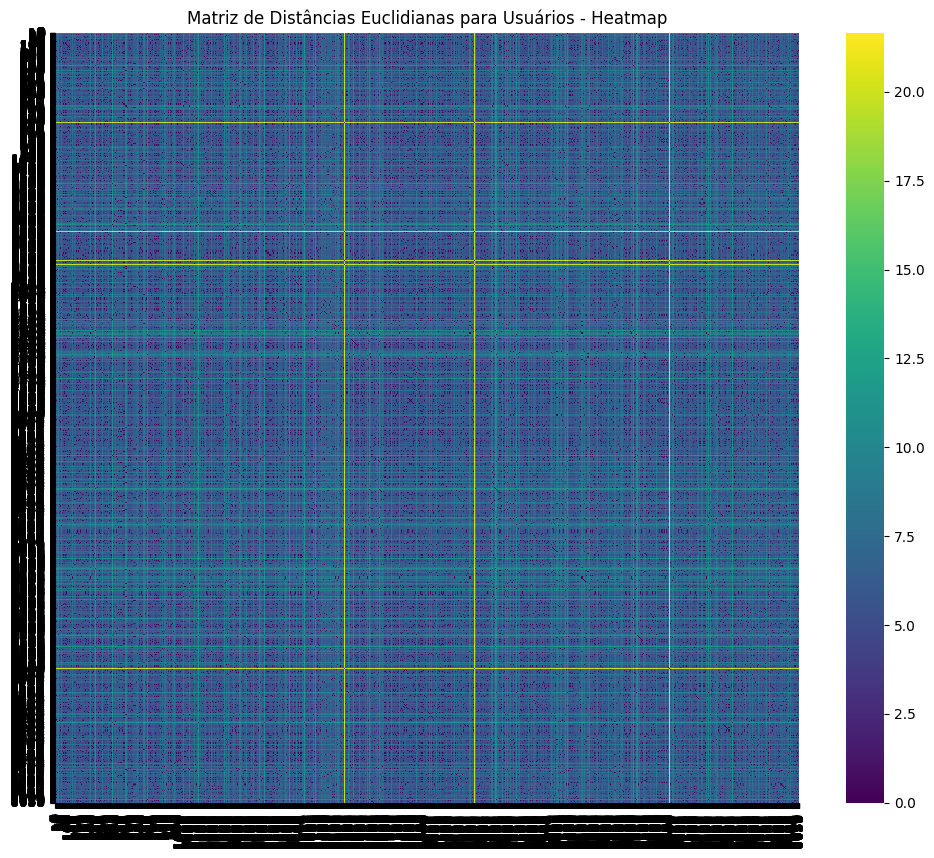

In [56]:
plt.figure(figsize=(12, 10))
sns.heatmap(dist_matrix_square, cmap='viridis', xticklabels=user_ids, yticklabels=user_ids)
plt.title('Matriz de Distâncias Euclidianas para Usuários - Heatmap')
plt.xticks(rotation=90)  # Rotacionar rótulos no eixo x para melhor visualização
plt.yticks(rotation=0)
plt.show()

agora para o ratings

In [ ]:
ratings_matrix = df_ratings.pivot(index='MovieID', columns='UserID', values='Rating').fillna(0)

In [ ]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(ratings_matrix)

In [ ]:
dist_matrix = pdist(data_normalized, metric='euclidean')
dist_matrix_square = squareform(dist_matrix)

In [ ]:
titles = df_movies.set_index('MovieID').loc[ratings_matrix.index, 'Title'].tolist()

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(dist_matrix_square, cmap='viridis', xticklabels=titles, yticklabels=titles)
plt.title('Matriz de Distâncias Euclidianas para Avaliações - Heatmap')
plt.xticks(rotation=90)  # Rotacionar rótulos no eixo x para melhor visualização
plt.yticks(rotation=0)
plt.show()